In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np  
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, r2_score, median_absolute_error, max_error, mean_absolute_error, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


C:\Users\User\AppData\Local\Temp\ipykernel_14228\2252525727.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

Decision Tree:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022

ever_married: -0.6951
heart_disease: 0.6615
hypertension: 0.5398
work_type: -0.2984
smoking_status: -0.1142
Residence_type: 0.1137
age: 0.0711
gender: -0.0581
bmi: -0.0090
avg_glucose_level: 0.0044


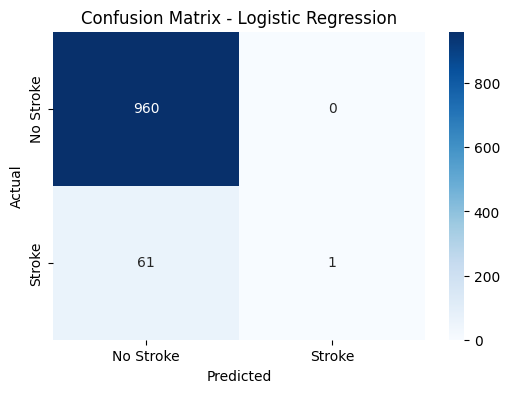

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

df.drop(['id'], axis=1, inplace=True)

df['bmi'].fillna(df['bmi'].mean(), inplace=True)

non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, y_pred))

feature_names = X.columns  # X includes your interaction terms
coefficients = lgr.coef_[0]

# Combine and display
for name, coef in sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {coef:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1360\1696226714.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__in

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.14      0.76      0.24        50

    accuracy                           0.76      1022
   macro avg       0.56      0.76      0.55      1022
weighted avg       0.94      0.76      0.83      1022

age: 3.2166
recon_error: -1.7829
age_bmi: -1.1372
bmi: 0.7603
ever_married: -0.7137
hypertension: -0.5013
gender: -0.4555
heart_disease: -0.4297
Residence_type: -0.4128
ht_hd: -0.3532
avg_glucose_level: 0.3153
work_type: -0.1290
smoking_status: -0.0237


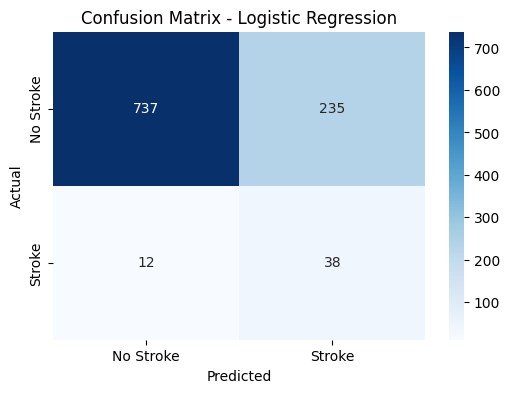

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers


df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.drop(['id'], axis=1, inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
#df.dropna(axis=1,inplace=True)

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
#df.drop(['work_type'],axis=1,inplace=True)

df['age_bmi'] = df['age'] * df['bmi']

df['ht_hd'] = df['hypertension'] * df['heart_disease']

from sklearn.preprocessing import StandardScaler
to_scale = ['age', 'bmi', 'avg_glucose_level', 'age_bmi']

scaler = StandardScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])

X = df.drop('stroke', axis=1)
y = df['stroke']

X_normal = X[y == 0]
X_train_ae, X_val_ae = train_test_split(X_normal, test_size=0.2, random_state=42)

autoencoder = Sequential([
    Dense(8, activation='relu', input_shape=(X.shape[1],), activity_regularizer=regularizers.l1(1e-5)),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(X.shape[1], activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_ae, X_train_ae, epochs=50, batch_size=32, validation_data=(X_val_ae, X_val_ae), verbose=0)

# Compute reconstruction error for all data
reconstructions = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructions, 2), axis=1)
X['recon_error'] = mse

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify= y
)

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train_resampled, y_train_resampled)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))

#Kiértékelés
feature_names = X.columns  
coefficients = lgr.coef_[0]

for name, coef in sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {coef:.4f}")

cm = confusion_matrix(y_test, y_pred)
labels = ['No Stroke', 'Stroke']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()